In [1]:
# Import pandas for data processing
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler 

In [2]:
# Read the dataset
data=pd.read_csv('studentclusters.csv')
data=data
data.head(10)

,marks,shours
0,72,20.0
1,42,19.0
2,77,7.0
3,93,22.0
4,30,20.0
5,53,15.0
6,74,8.0
7,28,24.0
8,69,26.0
9,64,7.0


In [3]:
x=data.shours
y=data.marks

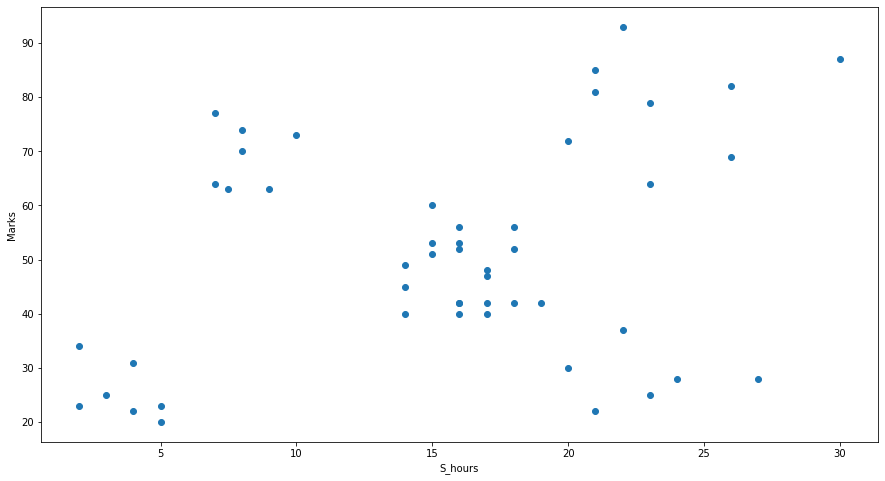

In [4]:
# Visualise the data using Scatter plot
fig = plt.figure(figsize = (15,8))
plt.scatter(x,y)
plt.xlabel('S_hours')
plt.ylabel('Marks')

plt.show()

In [5]:
# Fit and Transform the data for MinMax normalization
array=data.values


In [6]:
scaler = MinMaxScaler() 
rescaled = scaler.fit_transform(array) 
rescaled

array([[0.71232877, 0.64285714],
       [0.30136986, 0.60714286],
       [0.78082192, 0.17857143],
       [1.        , 0.71428571],
       [0.1369863 , 0.64285714],
       [0.45205479, 0.46428571],
       [0.73972603, 0.21428571],
       [0.10958904, 0.78571429],
       [0.67123288, 0.85714286],
       [0.60273973, 0.17857143],
       [0.91780822, 1.        ],
       [0.68493151, 0.21428571],
       [0.30136986, 0.57142857],
       [0.80821918, 0.75      ],
       [0.23287671, 0.71428571],
       [0.43835616, 0.5       ],
       [0.42465753, 0.46428571],
       [0.06849315, 0.75      ],
       [0.38356164, 0.53571429],
       [0.89041096, 0.67857143],
       [0.02739726, 0.67857143],
       [0.5890411 , 0.19642857],
       [0.30136986, 0.53571429],
       [0.54794521, 0.46428571],
       [0.49315068, 0.57142857],
       [0.04109589, 0.10714286],
       [0.30136986, 0.5       ],
       [0.2739726 , 0.42857143],
       [0.10958904, 0.89285714],
       [0.36986301, 0.53571429],
       [0.

In [20]:
# import KMeans for clustering
from sklearn.cluster import KMeans

In [21]:
css = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(array)
    css.append(kmeans.inertia_)
css

[21690.30612244898,
 7871.22456140351,
 4573.1153273809505,
 3083.4075757575765,
 1944.1510594668487,
 1360.2113636363633,
 938.7909090909092,
 747.2660714285715,
 606.3375,
 501.50416666666666]

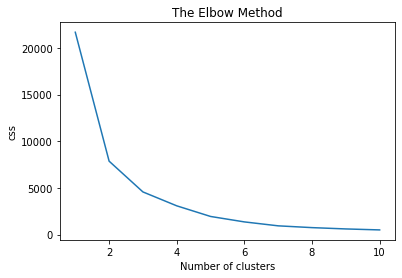

In [31]:
plt.plot(range(1, 11), css)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('css')
plt.show()

In [33]:
kmean = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
kmean.fit(array)
kmean.inertia_
kmean.labels_

array([0, 1, 0, 2, 4, 1, 0, 4, 0, 0, 2, 0, 1, 2, 4, 1, 1, 4, 1, 2, 4, 0,
       1, 0, 1, 3, 1, 1, 4, 1, 3, 3, 0, 3, 1, 3, 1, 1, 1, 0, 3, 1, 0, 1,
       2, 1, 1, 3, 2])

In [34]:
label=kmeans.labels_
label=pd.DataFrame(label)

In [35]:
label

,0
0,0
1,1
2,0
3,2
4,4
5,1
6,0
7,4
8,0
9,0


In [36]:
df=pd.concat([data,label],axis=1)


In [37]:
df=df.rename(columns={0:'label'})

In [38]:
df

,marks,shours,label
0,72,20.0,0
1,42,19.0,1
2,77,7.0,0
3,93,22.0,2
4,30,20.0,4
5,53,15.0,1
6,74,8.0,0
7,28,24.0,4
8,69,26.0,0
9,64,7.0,0


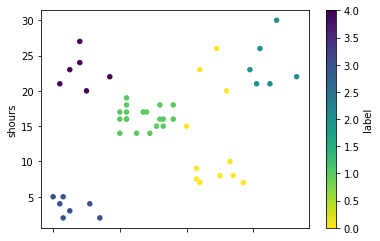

In [43]:

df.plot.scatter(x='marks',y='shours',c='label',cmap='viridis_r')